**Udemy 3-9. Classification Notebook**

# Classification Using Torch

In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer #load in the data from sklearn datasets

In [4]:
# Load the data
data = load_breast_cancer()
print(type(data))

<class 'sklearn.utils.Bunch'>


In [6]:
# As it is 'Bunch' object, this basically acts like a dictionary where you can treat the key like attributes.
print(data.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [8]:
# 'data' (the attribute) means the inputs data
print(data.data.shape)
print(data['target'].shape)

(569, 30)
(569,)


In [9]:
# 569 corresponding targets
print(data.target) #targets are jus 0s and 1s. 

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [11]:
# Target names
print(data.target_names)
# Feature names
print(data.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [27]:
# Split data to train and test sets
from sklearn.model_selection import train_test_split

# This will help us simulate how our model will perform in the future
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)
N, D = X_train.shape # N: number of samples - D: number of features

In [28]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # We calculate the transform params based on X_train using fit_transform
X_test = scaler.transform(X_test) # Apply the transform on the X_test based on previous params

In [62]:
# Build the model using PyTorch
model = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid(),
)

In [63]:
# Loss and Optimizer
criterion = nn.BCELoss() #Binary Cross-Entropy appropriate for binary classification
optimizer = torch.optim.Adam(model.parameters())

In [31]:
# Convert our data to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32)).reshape(-1,1)
y_test = torch.from_numpy(y_test.astype(np.float32)).reshape(-1,1)

In [64]:
# Train the model
n_epochs = 2000

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)
train_accuracies = np.zeros(n_epochs)
test_accuracies = np.zeros(n_epochs)

for it in range(n_epochs):
  # Zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  train_outputs = model(X_train)

  # Calculate the losses
  train_loss = criterion(train_outputs, y_train)
  train_loss.backward()

  # Store the loss
  train_losses[it] = train_loss.item()

  # Calculate and store the train accuracy
  with torch.no_grad():
    train_acc = np.mean(np.round(train_outputs.numpy()) == y_train.numpy())
  train_accuracies[it] = train_acc
  
  # Calculate test loss and store it in the test_losses
  test_outputs = model(X_test)
  test_loss = criterion(test_outputs, y_test)
  test_losses[it] = test_loss.item()

  # Calculate and store the test accuracy
  with torch.no_grad():
    test_acc = np.mean(np.round(test_outputs.numpy()) == y_test.numpy())
  test_accuracies[it] = test_acc

  # Optimize the parameter
  optimizer.step()

  # Print Process
  if (it + 1) % 50 == 0:
    print(f'Epoch {it+1}/{n_epochs}, train_loss: {train_loss.item():.4f}, test_loss: {test_loss.item():.4f}')

Epoch 50/2000, train_loss: 0.3788, test_loss: 0.3558
Epoch 100/2000, train_loss: 0.2883, test_loss: 0.2762
Epoch 150/2000, train_loss: 0.2343, test_loss: 0.2302
Epoch 200/2000, train_loss: 0.1992, test_loss: 0.2009
Epoch 250/2000, train_loss: 0.1749, test_loss: 0.1808
Epoch 300/2000, train_loss: 0.1570, test_loss: 0.1661
Epoch 350/2000, train_loss: 0.1434, test_loss: 0.1549
Epoch 400/2000, train_loss: 0.1326, test_loss: 0.1461
Epoch 450/2000, train_loss: 0.1239, test_loss: 0.1390
Epoch 500/2000, train_loss: 0.1166, test_loss: 0.1330
Epoch 550/2000, train_loss: 0.1105, test_loss: 0.1280
Epoch 600/2000, train_loss: 0.1052, test_loss: 0.1237
Epoch 650/2000, train_loss: 0.1006, test_loss: 0.1200
Epoch 700/2000, train_loss: 0.0966, test_loss: 0.1168
Epoch 750/2000, train_loss: 0.0931, test_loss: 0.1139
Epoch 800/2000, train_loss: 0.0899, test_loss: 0.1113
Epoch 850/2000, train_loss: 0.0870, test_loss: 0.1091
Epoch 900/2000, train_loss: 0.0844, test_loss: 0.1070
Epoch 950/2000, train_loss: 0

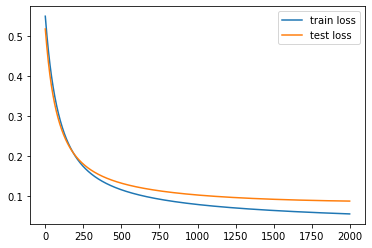

In [65]:
plt.plot(train_losses, label="train loss");
plt.plot(test_losses, label="test loss");
plt.legend()
plt.show()

In [66]:
# Get accuracy
with torch.no_grad(): # If we don't use .no_grad we must use .detach() function before converting the parameters to numpy
  p_train = model(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(p_train == y_train.numpy())

  p_test = model(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(p_test == y_test.numpy())

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9843, Test acc: 0.9787


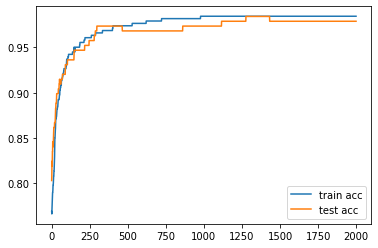

In [67]:
# Plot the accuracies
plt.plot(train_accuracies, label="train acc");
plt.plot(test_accuracies, label="test acc");
plt.legend()
plt.show()

# Save and Load Model

**Udemy 3-10. Saving and Loading a Model**

In [74]:
# Look at the state dict
model.state_dict() # OrderedDict

OrderedDict([('0.weight',
              tensor([[-0.3663, -0.6798, -0.5494, -0.6246, -0.2498, -0.3787, -0.5784, -0.6359,
                       -0.1745,  0.8511, -0.6211, -0.0577, -0.4441, -0.6405, -0.1790,  0.9981,
                        0.0581, -0.4137,  0.1906,  0.7939, -0.5754, -0.5634, -0.6955, -0.7037,
                       -0.3790, -0.4822, -0.5421, -0.4569, -0.6490, -0.8284]])),
             ('0.bias', tensor([0.6830]))])

In [89]:
# Save the model
torch.save(model.state_dict(), "my_model.pt")

In [76]:
!ls

my_model.pt  sample_data


In [90]:
# Load the model
model2 = nn.Sequential(
    nn.Linear(D, 1),
    nn.Sigmoid(),
)
model2.load_state_dict(torch.load("my_model.pt"))

<All keys matched successfully>

In [91]:
# Evaluate the new model
# Results should be same
with torch.no_grad(): # If we don't use .no_grad we must use .detach() function before converting the parameters to numpy
  p_train = model2(X_train)
  p_train = np.round(p_train.numpy())
  train_acc = np.mean(p_train == y_train.numpy())

  p_test = model2(X_test)
  p_test = np.round(p_test.numpy())
  test_acc = np.mean(p_test == y_test.numpy())

print(f"Train acc: {train_acc:.4f}, Test acc: {test_acc:.4f}")

Train acc: 0.9843, Test acc: 0.9787


# Download the Model

In [92]:
# It works with Chrome and may or may not work with other browsers
from google.colab import files
files.download("my_model.pt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>